# 2004 Sumatra-Andaman Islands Earthquake

Prepared by Muhammad Zahin Bin Zainal Abidin

This Earthquake happened in the region around the Indian territories of Nicobar and Andaman islands near the Bay of Bengal and the Andaman Sea where the Indian plate and the Burma plate collide. These two plates meet and form what is called a subduction zone, where one plate is forced beneath the other. In this case the Burma plate is forced beneath the Indian Plate resulting in substantial amounts of seismic activity.

<img src=https://upload.wikimedia.org/wikipedia/commons/c/c7/Tectonics_Sumatra_quake.gif>

[Reference](https://en.wikipedia.org/wiki/2004_Indian_Ocean_earthquake_and_tsunami)

Off the coast of Sumatra on December 26th, 2004 a megathrust earthquake occurred due to a rupture along the Burma and Indian plate boundary. This earthquake was recorded as having a 9.1 moment magnitude and a rupture duration of around four minutes, though ground motion was reported to have been felt for more than eight minutes. The hypocenter of the earthquake was measured to be 160 kilometers off of the coast of Sumatra with a depth of 30 kilometers. Due to the epicenter being underwater a series of Tsunamis followed the earthquake, some of which were around 100 feet high. The Sumatra-Andaman earthquake and the tsunamis caused by it affected 14 different countries and caused 227,898 fatalities.Below is the animation of the distance where the tsunami have travelled to.  

<img src=https://upload.wikimedia.org/wikipedia/commons/4/4c/2004_Indonesia_Tsunami_edit.gif>

In this first section of code we will assess seismic data from 10 years prior to the Earthquake.
The first thing we must do is load the necessary libraries in order for our code to properly function.

In [22]:
# import matplotlib pyplot so that we will be able to create plots in a similar way as MATLAB
import matplotlib.pyplot as plt
# import matplotlib dates to convert UTC time to a floating point number
import matplotlib.dates as mdates
# import UTCDateTime from obspy for best precision in time variable
from obspy import UTCDateTime
# import client to access IRIS database to pull earthquake data 
from obspy.clients.fdsn import Client
client=Client("IRIS")

<b>Set Search Parameters Here</b>

Below we will set the parameters needed to request earthquake data from our catalog. We will be looking at seismic data from 10 years prior to the Sumatra-Andaman earthquake, meaning we will need to set our start date to December 26th 1994. We will also need to include the date of the earthquake as our end date, the latitude and longitude of the epicenter, and the minimum magnitude we would like to recieve data for. The last thing we need to include is the maximum radius, a variable that indicates how far from our set latitude and longtiude we are willing to get data from (in degrees).

In [24]:
# input parameters
startt=UTCDateTime("1994-12-26")
endt=UTCDateTime("2004-12-26")
lat=3.316
lon=95.854
minmag=2.0
maxrad=1.0

We will now process a request to retrieve earthquake data. The catalog request may take a few minutes to complete depending on the number of events requested.

In [25]:
# retrieve earthquake data
cat=client.get_events(starttime=startt,endtime=endt,latitude=lat,longitude=lon,maxradius=maxrad,minmagnitude=minmag,catalog="ISC")

In [26]:
# print events retrieved
print(cat)

314 Event(s) in Catalog:
2004-11-04T02:40:23.630000Z |  +2.856,  +96.482 | 4.9  mb
2004-10-17T12:27:18.160000Z |  +3.643,  +95.182 | 3.5  mb
...
1995-03-14T10:27:33.950000Z |  +3.111,  +95.930 | 5.1  mb
1995-02-13T04:00:43.090000Z |  +3.310,  +96.117 | 4.4  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


Next we will create two arrays containing the origin time and magnitudes of the events requested. This is done by creating a loop that goes through each event in the catalog and extracts the origin time and magnitudes and then stores each in a separate list.

In [27]:
# create variable for array 'time'
times=[]
# create variable for array 'mags'
mags=[]
# create loop that retrieves origin time and mangitude from events in catalog and stores them in 'time' and 'mags'
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
# print data for fifth event in catalog
print(times[4],mags[4])
# convert dates to matplotlib number format
mtimes=mdates.date2num(times)
# print data for fifth event in catalog, now with proper date format
print(mtimes[4],mags[4])

2004-09-25 08:37:26.780000 4.8
12686.359337731481 4.8


In order to visualize the seismic activity prior to the Sumatra-Andaman earthquake we will create a plot that shows earthquake magnitudes between 1994 and 2004.

/tmp/ipykernel_703/2721489295.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(mtimes,mags,marker='.')


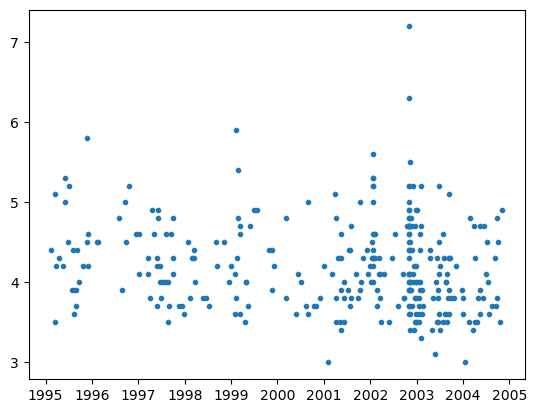

In [28]:
# assign figure 1 as the first and only plot using the subplots command
fig1=plt.subplots(1,1)
# plot mtimes vs magnitude using point symbols
plt.plot_date(mtimes,mags,marker='.')
# show the plot
plt.show()

The plot above shows a consistent level of seismic activity over time. From 1994 to 2002 we see a similar number of earthquakes each year ranging in magnitude from 3.0 to 6.0. In 2003 we see an increase in the number of earthquakes that occured as well two earthquakes with higher than average magnitudes. The number of earthquakes in 2003 could be seen as a precursor to the 2004 earthquake.



Next we will create a histogram to compare seismicity rates in the 10 years prior to the 2004 earthquake.

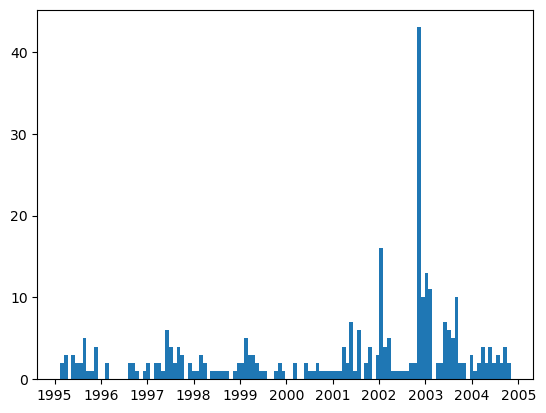

In [29]:
# assign figure 2 as the first and only plot in the subplot, include axes command to edit plot type
fig2,axes=plt.subplots(1,1)
# use axes command to change plot to histogram with a bin for each month over 10 years
axes.hist(mtimes,bins=120)
# set x axis to years located from date variables
axes.xaxis.set_major_locator(mdates.YearLocator())
# format years on x axis
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# show plot
plt.show()

The histogram above shows that in 2003 the seismicity rate dramatically increased, but dropped back towards the average levels before the 2004 earthquake.

<b>2. Seismic Trace Plots and Spectrograms using seismic recordings of the 2004 Sumatra-Andaman earthquake</b>

In this second section of code we will be using seismic station information to retrieve seismograms and create spectrograms. Three stations will be assessed, providing two minutes of data each.

In [31]:
# import client to access IRIS database
from obspy.clients.fdsn import Client
# import matplotlib pyplot to plot like MATLAB
import matplotlib.pyplot as plt
# import UTCDateTime for time precision
from obspy import UTCDateTime 

<b>The first recording is from II.PALK.00.BHZ</b>

This recording center is located at 7.2728,80.7022 in Pallekele, Sri Lanka. Sri Lanka is approximately 1370 kilometers from the Andaman Islands.

In [32]:
# assign variables to access recording
channel="BHZ"
location="00"
network="II"
station="PALK"
# use client command to indicate retrieval of data from IRIS database
client=Client("IRIS")
# assign start time as time of earthquake
startt=UTCDateTime("2004-12-26T00:58:53")
# assign end time as two minutes after earthquake
endt=UTCDateTime("2004-12-26T01:00:53")
# retrieve seismogram and store in stream, st
st=client.get_waveforms(network,station,location,channel,startt,endt)

We will now extract a seismic trace from the stream and plot it.

In [37]:
# extract a trace from st
tr=st[0]

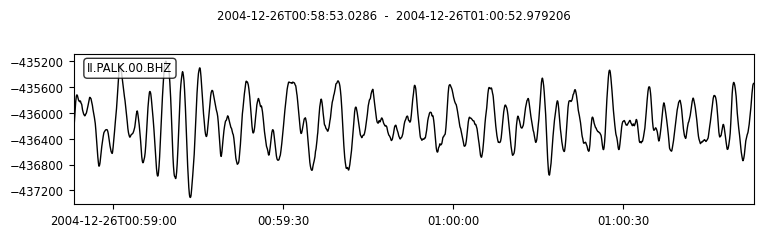

In [38]:
# plot trace in a figure visible in the notebook
fig=tr.plot()

This next piece of code will plot a spectrogram showing the frequency of the seismic trace over 120 seconds

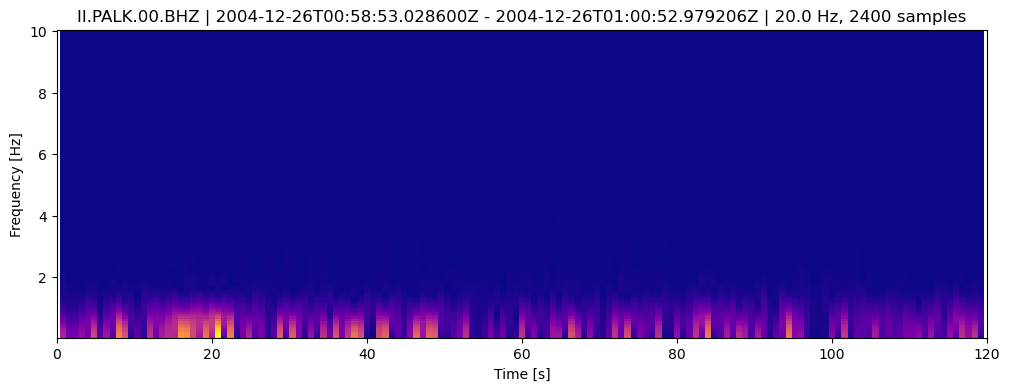

In [39]:
# assign parameters to make spectrogram similar in size to the seismic trace
plt.rcParams['figure.figsize']=(12,4)
# plot the spectrogram with a percent overlap of the sliding window set to 50% and a window length of 2 seconds
fig=tr.spectrogram(per_lap=.5,wlen=2,cmap='plasma')

The resulting spectrogram does not represent the wide range of energy on its current color scale. The next two sections of code will assess how we can improve the quality of this spectrogram. The first thing we will do is determine the limits of the color range so that we can change the maximum value. We will then change the maximum value based on our results and adjust the y axis to focus on specific frequencies.

(4.172594821831108e-05, 1347.8827145966295)


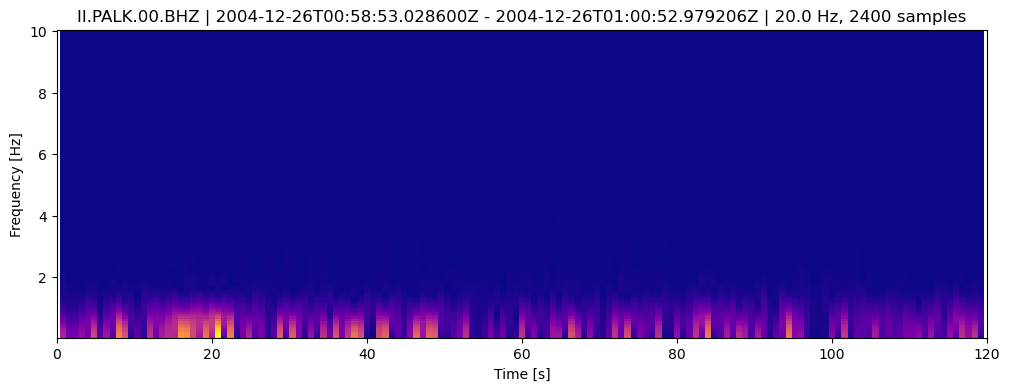

In [40]:
# create figure with the same parameters as spectrogram above
fig=tr.spectrogram(show=False,per_lap=.5,wlen=2,cmap='plasma')
# extract the plot axes and store as ax
ax=fig.axes[0]
# extract the image inside the plot and store as im
im=ax.images[0]
# print limits of color range in figure
print(im.get_clim())

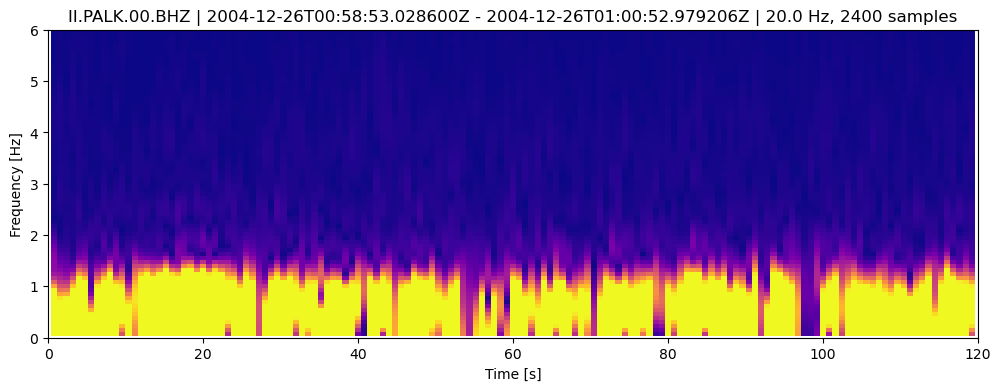

In [41]:
# create another figure 
fig=tr.spectrogram(show=False,per_lap=0.5,wlen=2,cmap='plasma')
# extract plot axes and store as ax
ax=fig.axes[0]
# adjust the y axis range to show frequencies between 0 and 6
ax.set_ylim(0,6)
# extract the image inside of the plot and store as im
im=ax.images[0]
# set maximum value of color range to be 10% of amplitude variations
im.set_clim(vmax=130)

Now that we have this visually amplified spectrogram, frequencies are revealed that aren't present on the original seismogram. We can use a bandpass filter on the seismogram and present a seismic trace that correlates with the spectrogram and only shows frequencies between 0.01Hz and 1Hz.

In [44]:
# create a copy of the seismic trace that the filter can be applied to
ftr=tr.copy()


In [56]:
# apply the bandpass filter with a range equivalent to the revealed frequencies
ftr.filter(type='bandpass',freqmin=0.01,freqmax=1.0)

II.PALK.00.BHZ | 2004-12-26T00:58:53.028600Z - 2004-12-26T01:00:52.979206Z | 20.0 Hz, 2400 samples

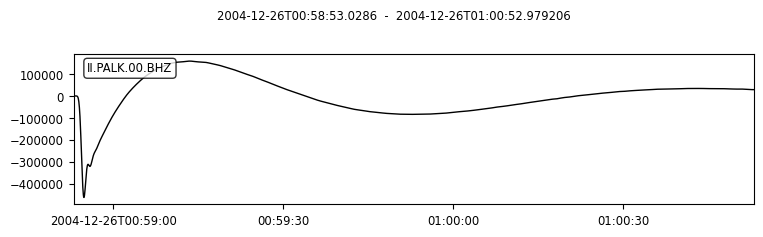

In [54]:
# Show plot
fig =ftr.plot()

<b> The second recording is from IU.CHTO.00.BHZ </b>


This recording center is located at 18.8141,98.9443 in Chiang Mai, Thailand. Chiang Mai is approximately 1036 kilometers from the Andaman Islands.

In [57]:
# assign variables to access recording
channel="BHZ"
location="00"
network="IU"
station="CHTO"
# use client command to indicate data retrieval from IRIS database
client=Client("IRIS")
# set start time to time of earthquake
startt=UTCDateTime("2004-12-26T00:58:53")
# set end time to 2 minutes after earthquake
endt=UTCDateTime("2004-12-26T01:00:53")
# retrieve seismogram and store it in stream, st
st=client.get_waveforms(network,station,location,channel,startt,endt)

We will now extract a seismic trace from the stream and plot it.

In [58]:
# extract trace from st
tr=st[0]

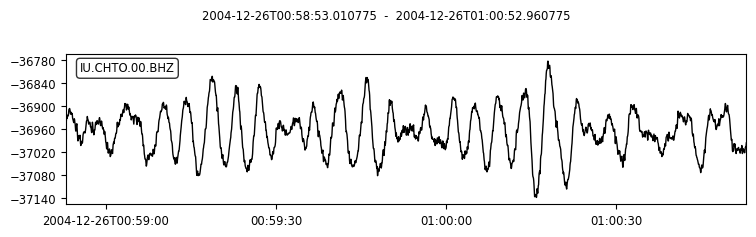

In [59]:
# plot trace in a figure visible in the notebook
fig=tr.plot()

This next piece of code will plot a spectrogram showing the frequency of the seismic trace over 120 seconds.We will go ahead and determine the limits of the color range and adjust our spectrogram to focus on specific frequencies.

(2.621969104983216e-05, 210.39912710184245)


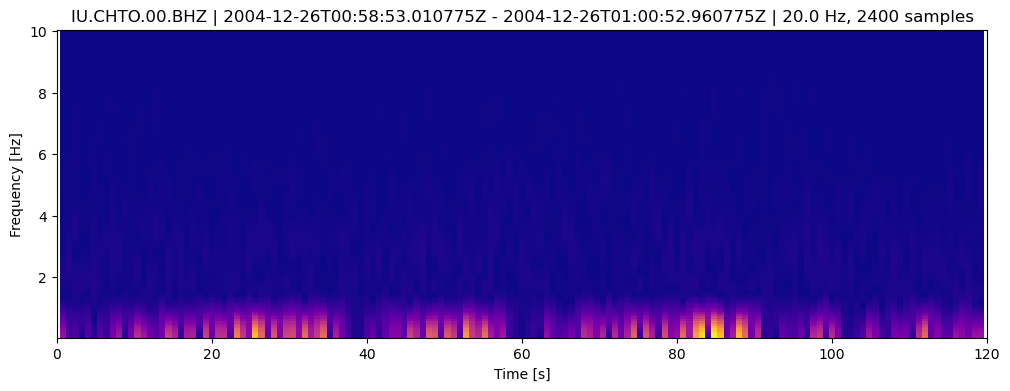

In [60]:
# assign parameters to make spectrogram a similar size as the seismic trace
plt.rcParams['figure.figsize']=(12,4)
# plot the spectrogram with a percent overlap of 50% and a window length of 2 seconds
fig=tr.spectrogram(show=False,per_lap=.5,wlen=2,cmap='plasma')
# extract plot axes and store in ax
ax=fig.axes[0]
# extract the image inside the plot and store in im
im=ax.images[0]
# print limits of color range in figure
print(im.get_clim())

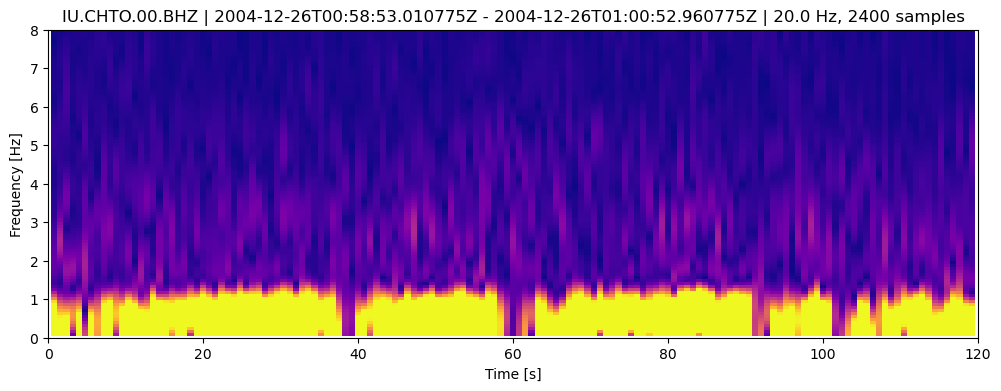

In [61]:
# create figure with the parameters as spectrogram above
fig=tr.spectrogram(show=False,per_lap=0.5,wlen=2,cmap='plasma')
# extract the plot axes and store as ax
ax=fig.axes[0]
# set y axis limit to focus on frequencies between 0 and 8
ax.set_ylim(0,8)
# extract the image inside the plot and store as im
im=ax.images[0]
# set maximum value of color range to be 10% of amplitude variations
im.set_clim(vmax=20)

Here we will apply another bandpass filter, this time limiting the frequencies shown on the seismic trace to be between 0.5Hz and 3Hz.

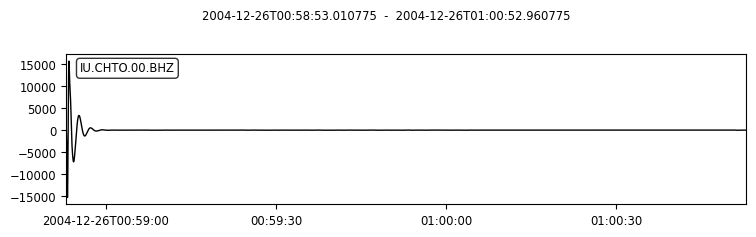

In [62]:
# create a copy of the seismic trace 
ftr=tr.copy()
# apply bandpass filter
ftr.filter(type='bandpass',freqmin=0.5,freqmax=3)
# show plot
fig=ftr.plot()

The third recording is from PS.PSI.00.BHZ

This recording station is located at 2.6938,98.923698 in Parpat, Indonesia. Parpat is approximately 1223 kilometers from the Andaman Islands. This recording station is not the closest of the three to the epicenter of the 2004 earthquake, but it is the only one of the three that is on the Burma plate. Parpat, Indonesia is on the eastern side of the Burma plate where it collides with the Sunda Plate.

In [63]:
# assign variables to access recording
channel="BHZ"
location="--"
network="PS"
station="PSI"
# use client command to indicate retrieval of data from IRIS database
client=Client("IRIS")
# assign start time as time of earthquake
startt=UTCDateTime("2004-12-26T00:58:53")
# assign end time as two minutes after earthquake
endt=UTCDateTime("2004-12-26T01:00:53")
# retrieve seismogram and store in stream, st
st=client.get_waveforms(network,station,location,channel,startt,endt)

We will now extract a seismic trace from the stream and plot it.

In [64]:
# extract trace from st
tr=st[0]

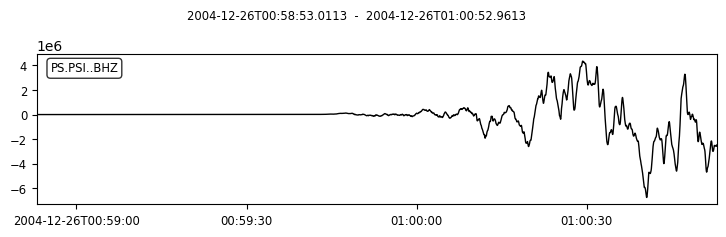

In [65]:
# plot trace in a figure visible in the notebook
fig=tr.plot()

This next piece of code will plot a spectrogram showing the frequency of the seismic trace over 120 seconds and apply the same variations as the two previous spectrograms.

(0.000522017305928362, 7921308.479203349)


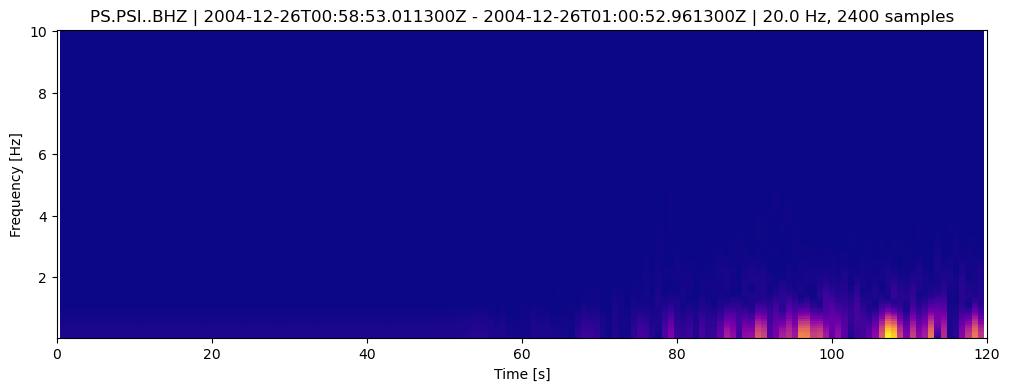

In [67]:
# assign parameters to make spectrogram a similar size as the seismic trace
plt.rcParams['figure.figsize']=(12,4)
# plot the spectrogram with percent overlap of 50% and a window length of 2 seconds
fig=tr.spectrogram(show=False,per_lap=.5,wlen=2,cmap='plasma')
# extract plot axes and store in ax
ax=fig.axes[0]
# extract the image inside of the plot and store in im
im=ax.images[0]
# print limits of color range in figure
print(im.get_clim())

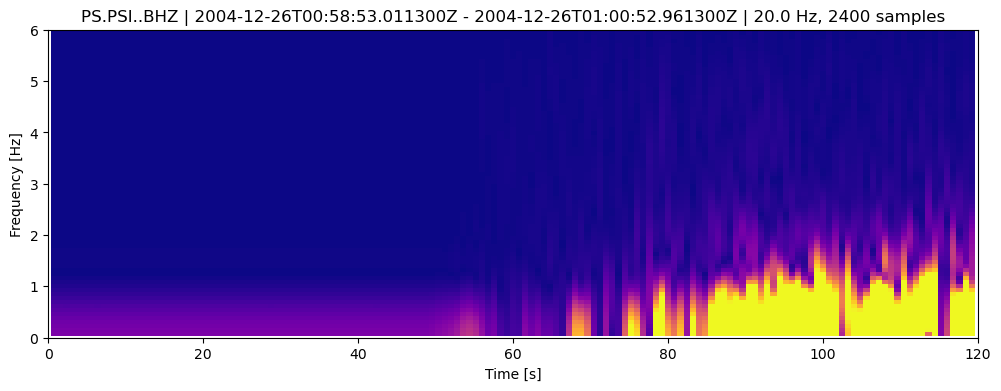

In [68]:
# create figure with same parameters as spectrogram above
fig=tr.spectrogram(show=False,per_lap=0.5,wlen=2,cmap='plasma')
# extract the plot axes and store as ax
ax=fig.axes[0]
# set y axis limits to focus on frequencies between 0 and 6
ax.set_ylim(0,6)
#extract the image from inside the plot and store in im
im=ax.images[0]
# set maximum value of color range to be 10% of amplitude variations
im.set_clim(vmax=800000)

Here we will apply a bandpass filter to present a seismic trace plotting frequencies between 1.5Hz and 5Hz.

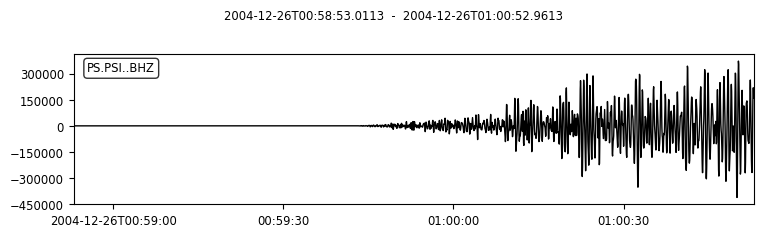

In [69]:
# create copy of seismic trace
ftr=tr.copy()
# apply bandpass filter
ftr.filter(type='bandpass',freqmin=1.5,freqmax=5)
# show plot
fig=ftr.plot()

Conclusion : Based on our first study on the seismicity of the region on the 10 years scale we can conclude that the 9.1-9.3 Megtitude impact was sudden and abrupt. A year before the earthquake there was relative small to medium earthquakes magnitude of 3-5. While our second findings based on the second study is that proves that Earthquakes typically have energy over a wider range of frequencies. On station PSI we can see a burst of energy at a later time of frequency with maximum frequency of 4-7 Hz. Wheras on stations PALK and CHTO there are constant burst of energy througout the sepctography at a constant level of frequency 4-6 Hz. 